In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [15]:
data = pd.read_csv('iso_clipped.csv', header = 0)
data

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,Gmag,G_BPmag,G_RPmag
0,0.017268,0.074,8.9,0.090000,1.081690,0.090,-3.367,3.3637,5.166,0,...,0.2796,0.003109,0.000839,0.007606,-1.0,0.01729,13.188,15.157,18.141,13.792
1,0.017268,0.074,8.9,0.094002,1.118957,0.094,-3.307,3.3723,5.160,0,...,0.2796,0.003109,0.000839,0.007606,-1.0,0.01729,13.039,15.008,17.990,13.643
2,0.017268,0.074,8.9,0.100000,1.171106,0.100,-3.214,3.3856,5.147,0,...,0.2796,0.003109,0.000839,0.007606,-1.0,0.01729,12.806,14.775,17.752,13.410
3,0.017268,0.074,8.9,0.106957,1.226722,0.107,-3.133,3.3967,5.140,0,...,0.2796,0.003109,0.000839,0.007606,-1.0,0.01729,12.604,14.572,17.546,13.208
4,0.017268,0.074,8.9,0.120000,1.319316,0.120,-2.984,3.4166,5.119,0,...,0.2796,0.003109,0.000839,0.007606,-1.0,0.01729,12.230,14.187,17.136,12.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,0.017268,0.074,10.1,0.985031,2.469727,0.709,3.337,3.4746,-0.198,7,...,0.2931,0.002571,0.001293,0.007485,-1.0,0.01828,-3.573,-0.720,2.365,-2.080
5428,0.017268,0.074,10.1,0.985031,2.469727,0.706,3.356,3.4714,-0.232,7,...,0.2931,0.002571,0.001293,0.007485,-1.0,0.01828,-3.620,-0.716,2.390,-2.079
5429,0.017268,0.074,10.1,0.985031,2.469727,0.702,3.372,3.4688,-0.260,7,...,0.2931,0.002571,0.001293,0.007485,-1.0,0.01828,-3.659,-0.715,2.409,-2.079
5430,0.017268,0.074,10.1,0.985031,2.469727,0.696,3.391,3.4656,-0.296,7,...,0.2931,0.002571,0.001293,0.007485,-1.0,0.01828,-3.707,-0.718,2.431,-2.084


55


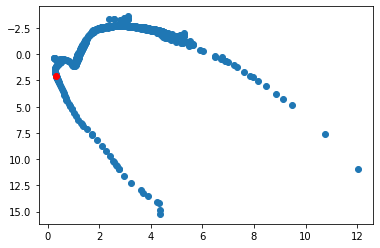

In [55]:
dados = data[data['logAge']==9.0]
cor = dados['G_BPmag']-dados['G_RPmag']
mag = np.array(dados['Gmag'])
cor = np.array(cor)

#valor = int(len(dados)/4)
valor = int(0.08*(len(dados)))
oi = sorted(cor)[0:valor]
b = np.mean(oi)
for i in range(len(cor)):
    if cor[i] > b:
        continue
    else:
        local_minimo = i
        break
print(local_minimo)
#local_minimo = 160
plt.scatter(cor,mag)
plt.scatter(cor[local_minimo],mag[local_minimo], color = 'red')
plt.gca().invert_yaxis() 

In [32]:
0.1*int(len(dados))

40.400000000000006

In [22]:
age = np.unique(data['logAge'])
age

array([ 8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1])

In [52]:
Mvarray = []
Bvarray = []
for element in age:
    a = data[data['logAge']==element]
    b = a['Gmag'].tolist()
    c = (a['G_BPmag'] - a['G_RPmag']).tolist()
    Mvarray.append(b)
    Bvarray.append(c)

In [53]:
f = open("Regressoes_Isocronas_Gaia.txt", "w")
f.write("Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(BP-RP)TurnOff,GmagTurnOff,Ajustadas/Total\n")
for i in range(len(age)):
    cor = Bvarray[i]
    cor = np.asarray(cor)
    mag = Mvarray[i]
    mag = np.asarray(mag)
    valor = int(0.08*(len(dados)))
    crescente = sorted(cor)[0:valor]
    media = np.mean(crescente)
    for j in range(len(cor)):
        if cor[j] > media:
            continue
        else:
            local_minimo_cor = j
            break
    #local_minimo_cor = np.where(cor==np.min(cor))[0][0]
    problematicas = [6.6,6.7]
    if age[i] in problematicas:
        local_minimo_cor = 160
    cor_turnoff = cor[local_minimo_cor]
    mag_turnoff = mag[local_minimo_cor]

    cor_mainseq = cor[0:local_minimo_cor]
    mag_mainseq = mag[0:local_minimo_cor]
    first_regress = stats.linregress(cor_mainseq,mag_mainseq)
    cor_mainseq = np.asarray(cor_mainseq)
    mag_mainseq = np.asarray(mag_mainseq)
    t_fit = np.linspace(cor_mainseq.min(),cor_mainseq.max(), len(cor_mainseq))
    sigmay = np.sqrt((t_fit*first_regress.stderr)**2 + (first_regress.intercept_stderr)**2)
    
    cor_clippada = []
    mag_clippada = []
    count = 0
    ytentativa = first_regress.slope*cor_mainseq + first_regress.intercept
    for element in mag_mainseq:
        if ytentativa[count] + sigmay[count] >= element and ytentativa[count] - sigmay[count] <= element:
            cor_clippada.append(cor_mainseq[count])
            mag_clippada.append(mag_mainseq[count])
        count+=1
    cor_clippada = np.asarray(cor_clippada)
    mag_clippada = np.asarray(mag_clippada)
    
    razao = str(len(cor_clippada)/len(cor_mainseq)) + '= ' + str(len(cor_clippada)) + '/' + str(len(cor_mainseq))
    #Nova regressao para as estrelas que sao pertencentes ao intervalo sigma#
    
    final_regression = stats.linregress(cor_clippada,mag_clippada)
    f.write(str(age[i]) + ', ' + str(final_regression.slope) + ', ' +  str(final_regression.intercept) + ', ' + str(final_regression.stderr) + ', ' + 
            str(final_regression.intercept_stderr) +  ', ' + str(final_regression.rvalue) + ', '+ str(cor_turnoff) + ', ' + str(mag_turnoff) + ', ' + razao + '\n')
f.close()